. . . . .Building UNET. . . . .
. . . . .Build Compeleted. . . . .
. . . . .Reading images. . . . .


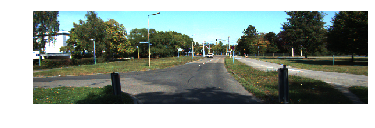

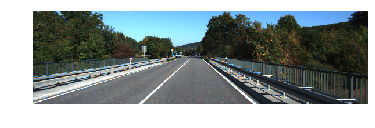

. . . . .Predicting. . . . .


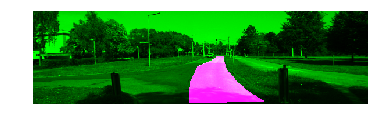

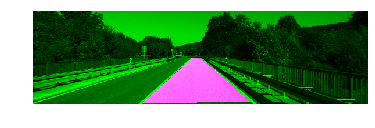

In [3]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
from src.backend import *

def show_image(img_path):

    img = image.load_img(img_path, target_size=(160, 576))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    return img_tensor


if __name__ == "__main__":

    # load model
    model = UNET((576,160), 2).build()
    model.load_weights("UNET.h5")
    
    # image path on random images
    img_path = './data/data_road/testing/image_2/um_000044.png'    
    img2_path = './data/data_road/testing/image_2/um_000069.png'   

    # load a single image
    print(". . . . .Reading images. . . . .")
    new_image = show_image(img_path)
    new_image2 = show_image(img2_path)

    # check prediction
    print(". . . . .Predicting. . . . .")
    pred = model.predict(new_image)
    pred2 = model.predict(new_image2)
    save_path = './data/data_road/prediction/prediction.png'
    save_path2 = './data/data_road/prediction/prediction2.png'
    saveResult(pred,save_path)
    saveResult(pred2,save_path2)
    
    # display overlay visualization
    new_image = show_image(save_path)
    new_image = show_image(save_path2)
    